In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from basketball_reference_scraper.players import get_stats, get_game_logs, get_player_headshot

## Player Functions

In [7]:
# glossary:
"""GmSc - Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV
"""


'GmSc - Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV\n'

In [24]:
# get game logs for tatum
tatum = get_game_logs('Jayson Tatum', '2017-10-17', '2021-09-19', playoffs=False)
tatum.head()

You searched for "Jayson Tatum"
1 result found.
Jayson Tatum
Results for Jayson Tatum:



,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,2017-10-17,19-228,BOS,AWAY,CLE,L (-3),1,36:32,5,12,...,6,10,3,0,0,1,4,14,11.7,+8
1,2017-10-18,19-229,BOS,HOME,MIL,L (-8),1,36:32,3,7,...,7,9,2,1,0,2,3,8,5.8,-15
2,2017-10-20,19-231,BOS,AWAY,PHI,W (+10),1,32:45,3,8,...,6,8,0,0,3,3,3,15,11.7,-4
3,2017-10-24,19-235,BOS,HOME,NYK,W (+21),1,31:08,9,15,...,3,4,2,4,2,3,4,22,18.9,+10
4,2017-10-26,19-237,BOS,AWAY,MIL,W (+7),1,27:49,3,6,...,2,2,3,1,0,2,1,12,10.3,+8


In [27]:
tatum['GAME_SCORE'] = tatum['GAME_SCORE'].astype(float)

In [28]:
tatum['GAME_SCORE'].max()
tatum['GAME_SCORE'].min()

-3.3

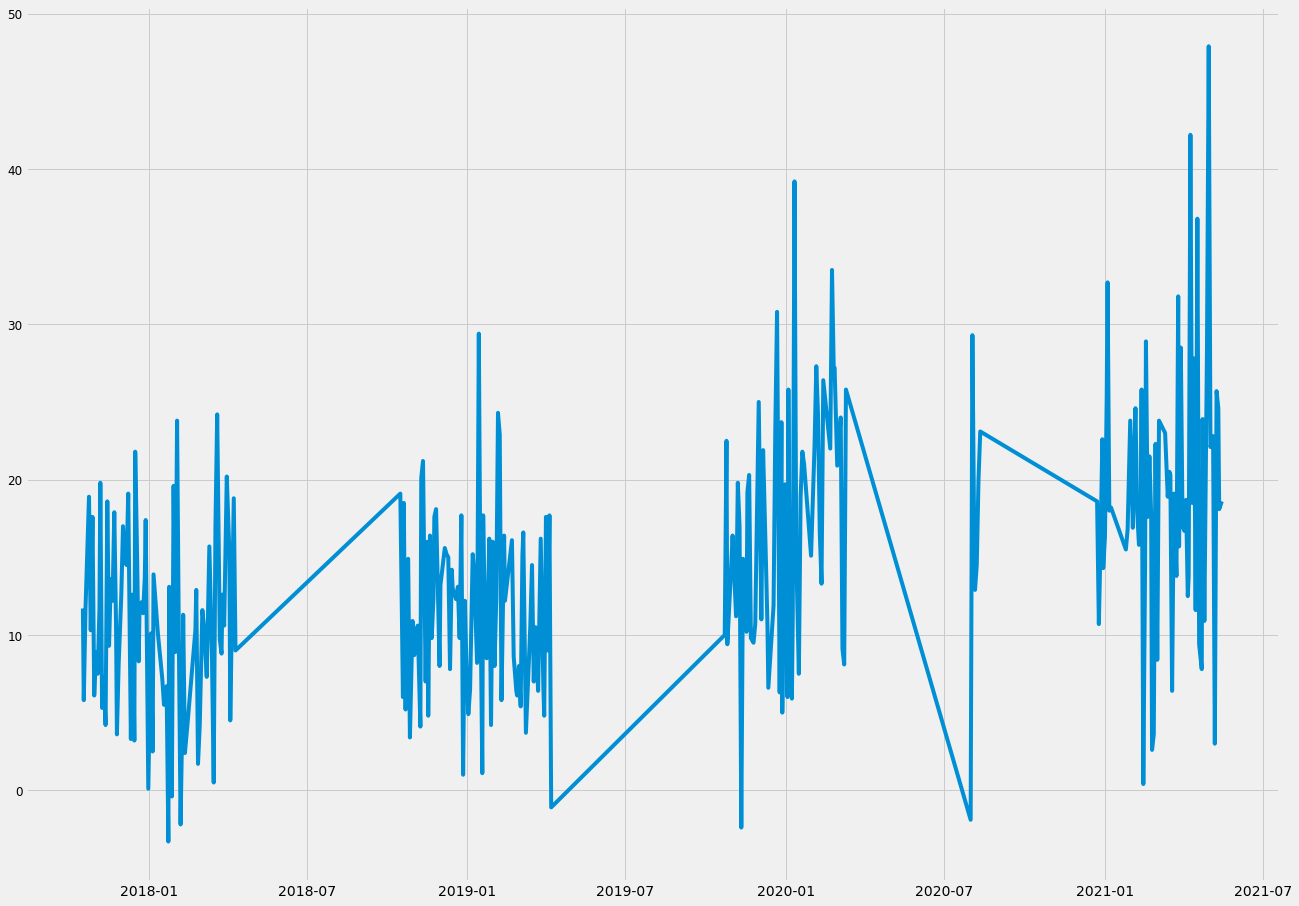

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
plt.plot(tatum['DATE'], tatum['GAME_SCORE'])
plt.yticks(fontsize=12)
plt.show()

## Team Functions

In [9]:
from basketball_reference_scraper.teams import get_roster, get_team_stats, get_opp_stats, get_roster_stats,get_team_misc
